# Data Visualization

Data visualization helps capturing other aspects of the Data

- Matplotlib
- Seaborn
- ggplot (TODO)
- Bokeh (TODO)

## Matplotlib

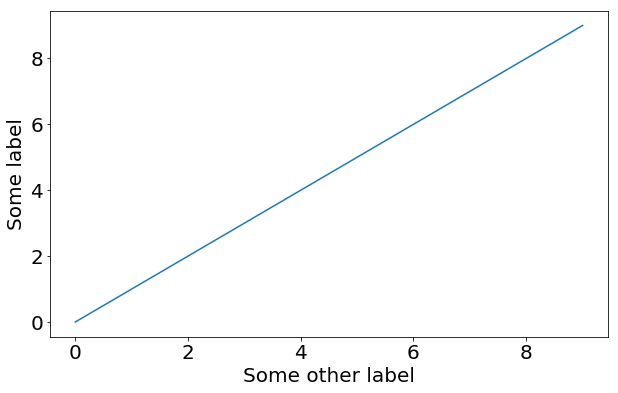

In [2]:
#lets do a simple plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(range(10))
plt.ylabel("Some label", fontsize=20)
plt.xlabel("Some other label", fontsize=20)
plt.tick_params(labelsize=20)

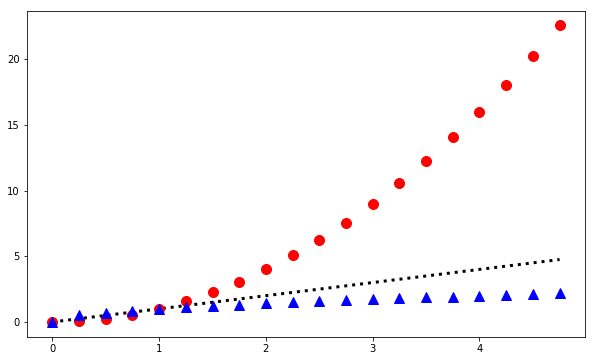

In [3]:
#multiple curves on the same graph
import numpy as np

x = np.arange(20) / 4.
y1 = x ** 2
y2 = x ** 0.5


plt.figure(figsize=(10,6))
plt.savefig('foo.pdf')
plt.plot(x, x, "k:",
         x, y1, "ro",
         x, y2, "b^",
         linewidth=3,
         ms=10 # or markersize
        );
# plt.savefig('foo.pdf')
# plt.close()

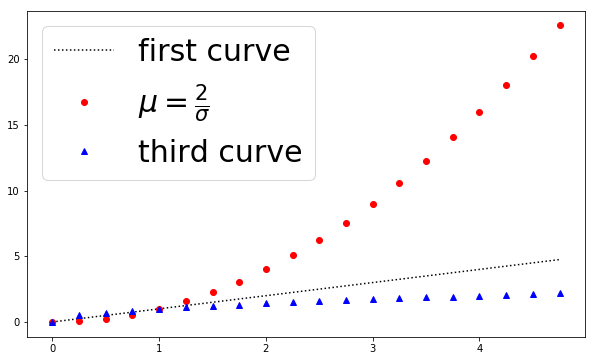

In [4]:
# equivalent
x = np.arange(20) / 4.
y1 = x ** 2
y2 = x ** 0.5

plt.figure(figsize=(10,6))

plt.plot(x, x, "k:", label="first curve")
plt.plot(x, y1, "ro", label=r"$\mu=\frac{2}{\sigma}$")
plt.plot(x, y2, "b^", label="third curve")
plt.legend(fontsize=30, loc="best")

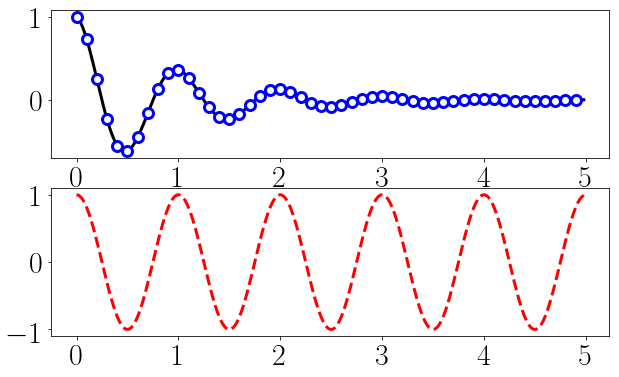

In [5]:
## multiple figures
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(10,6))
plt.rc("text", usetex=True)
plt.tick_params(labelsize=30)

plt.subplot(211) # row number, column number, figure number
plt.plot(t2, f(t2), 'k', t1, f(t1), 'bo',
         lw=3, #linewidth
         ms=10, #markersize
         mfc="w", # or markerfacecolors
         mew=3)
plt.tick_params(labelsize=30)

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--', lw=3, ms=10)
plt.tick_params(labelsize=30)
plt.show()

<function matplotlib.pyplot.legend>

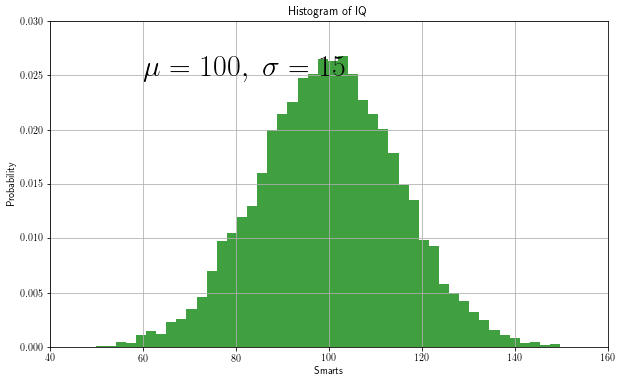

In [6]:
# With text
import numpy as np

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$', fontsize=30)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.legend

(-1.5, 1.5)

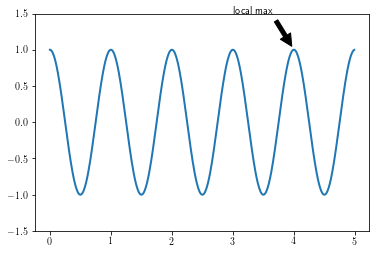

In [13]:
## annotation

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(4, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.ylim(-1.5,1.5)


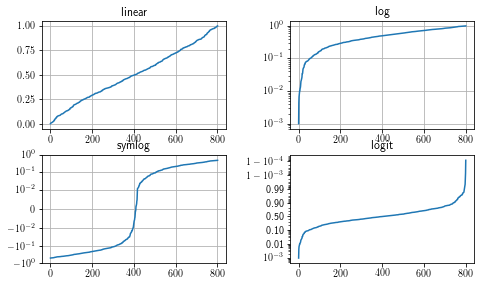

In [72]:
%matplotlib inline
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
# plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
from matplotlib.ticker import NullFormatter
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=3, right=4, hspace=0.25,
                    wspace=0.35)


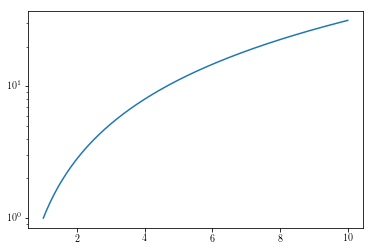

In [73]:
x = np.linspace(1,10, 200)
y = np.power(x, 3./2.)
plt.semilogy(x, y)

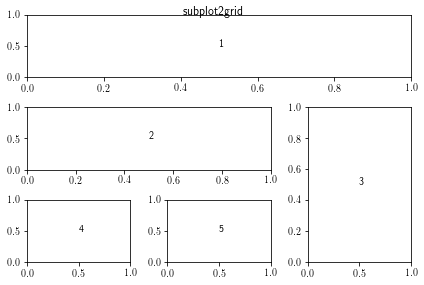

In [21]:
#subplot2grid

plt.figure(0)
plt.rc("text",usetex=True)

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.text(0.5, 0.5, "1")
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax2.text(0.5, 0.5, "2")
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax3.text(0.5, 0.5, "3")
ax4 = plt.subplot2grid((3,3), (2, 0))
ax4.text(0.5, 0.5, "4")
ax5 = plt.subplot2grid((3,3), (2, 1))
ax5.text(0.5, 0.5, "5")

plt.suptitle("subplot2grid")
plt.tight_layout()

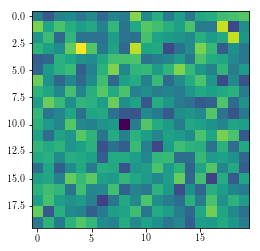

In [43]:
# heatmap 
plt.imshow(np.random.normal(size=(20, 20)))

<IPython.core.display.Javascript object>


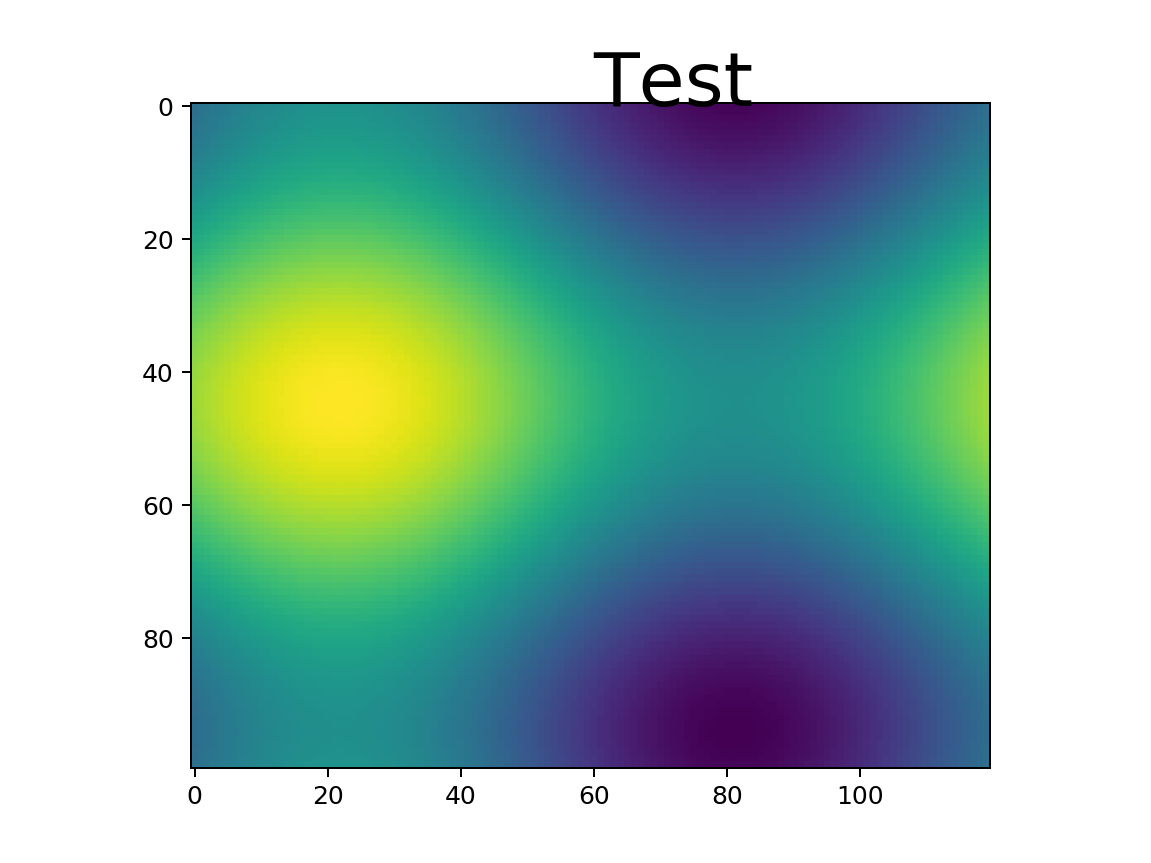

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)
text = plt.text(60, .025, r'$\mu=100,\ \sigma=15$', fontsize=30)

def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
#     fig.text()
    im.set_array(f(x, y))
    text.set_text("Test")
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=100, interval=50, blit=True)



## Seaborn

In [19]:
## Loading the data

import seaborn as sns

titanic_df = sns.load_dataset("titanic")
titanic_df

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

## Distribution plots

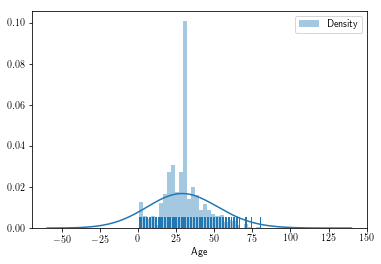

In [22]:
# Distribution of the age
%matplotlib inline
sns.distplot(titanic_df["age"].fillna(titanic_df["age"].mean()),
             bins=None,
             kde=True, # Kernel density estimation: many gaussians for each observations summed
             rug=True,
             kde_kws={"bw":20},
             norm_hist=False, axlabel="Age", label="Density")

plt.legend();

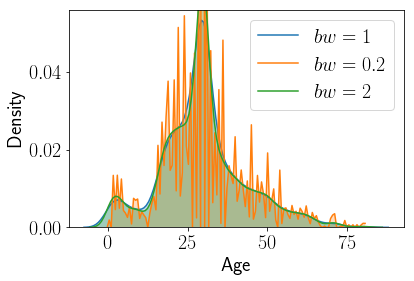

In [24]:
sns.kdeplot(titanic_df["age"].fillna(titanic_df["age"].mean()), shade=True, label=r"$bw=1$")
sns.kdeplot(titanic_df["age"].fillna(titanic_df["age"].mean()), bw=0.2, shade=True, label=r"$bw=0.2$")
sns.kdeplot(titanic_df["age"].fillna(titanic_df["age"].mean()), bw=2, shade=True, label=r"$bw=2$")

plt.xlabel("Age", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

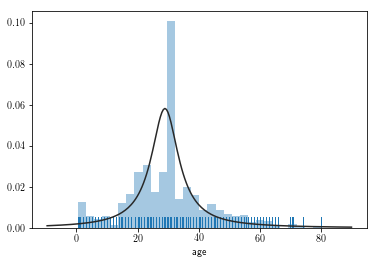

In [26]:
## fitting
from scipy import stats

sns.distplot(titanic_df["age"].fillna(titanic_df["age"].mean()),
             bins=None,
             kde=False,
             rug=True,
             fit=stats.cauchy)

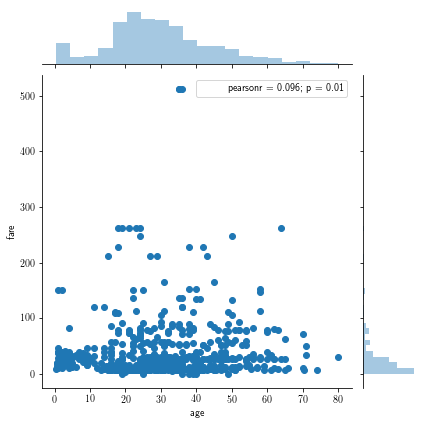

In [27]:
## joinplots

sns.jointplot(x="age", y="fare", data=titanic_df)

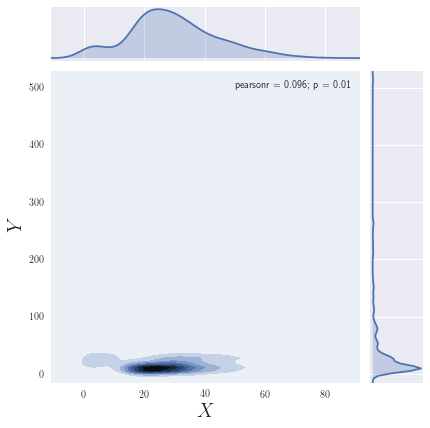

In [126]:
g = sns.jointplot(x="age", y="fare", data=titanic_df, kind="kde")
g.set_axis_labels("$X$", "$Y$", fontsize=20)



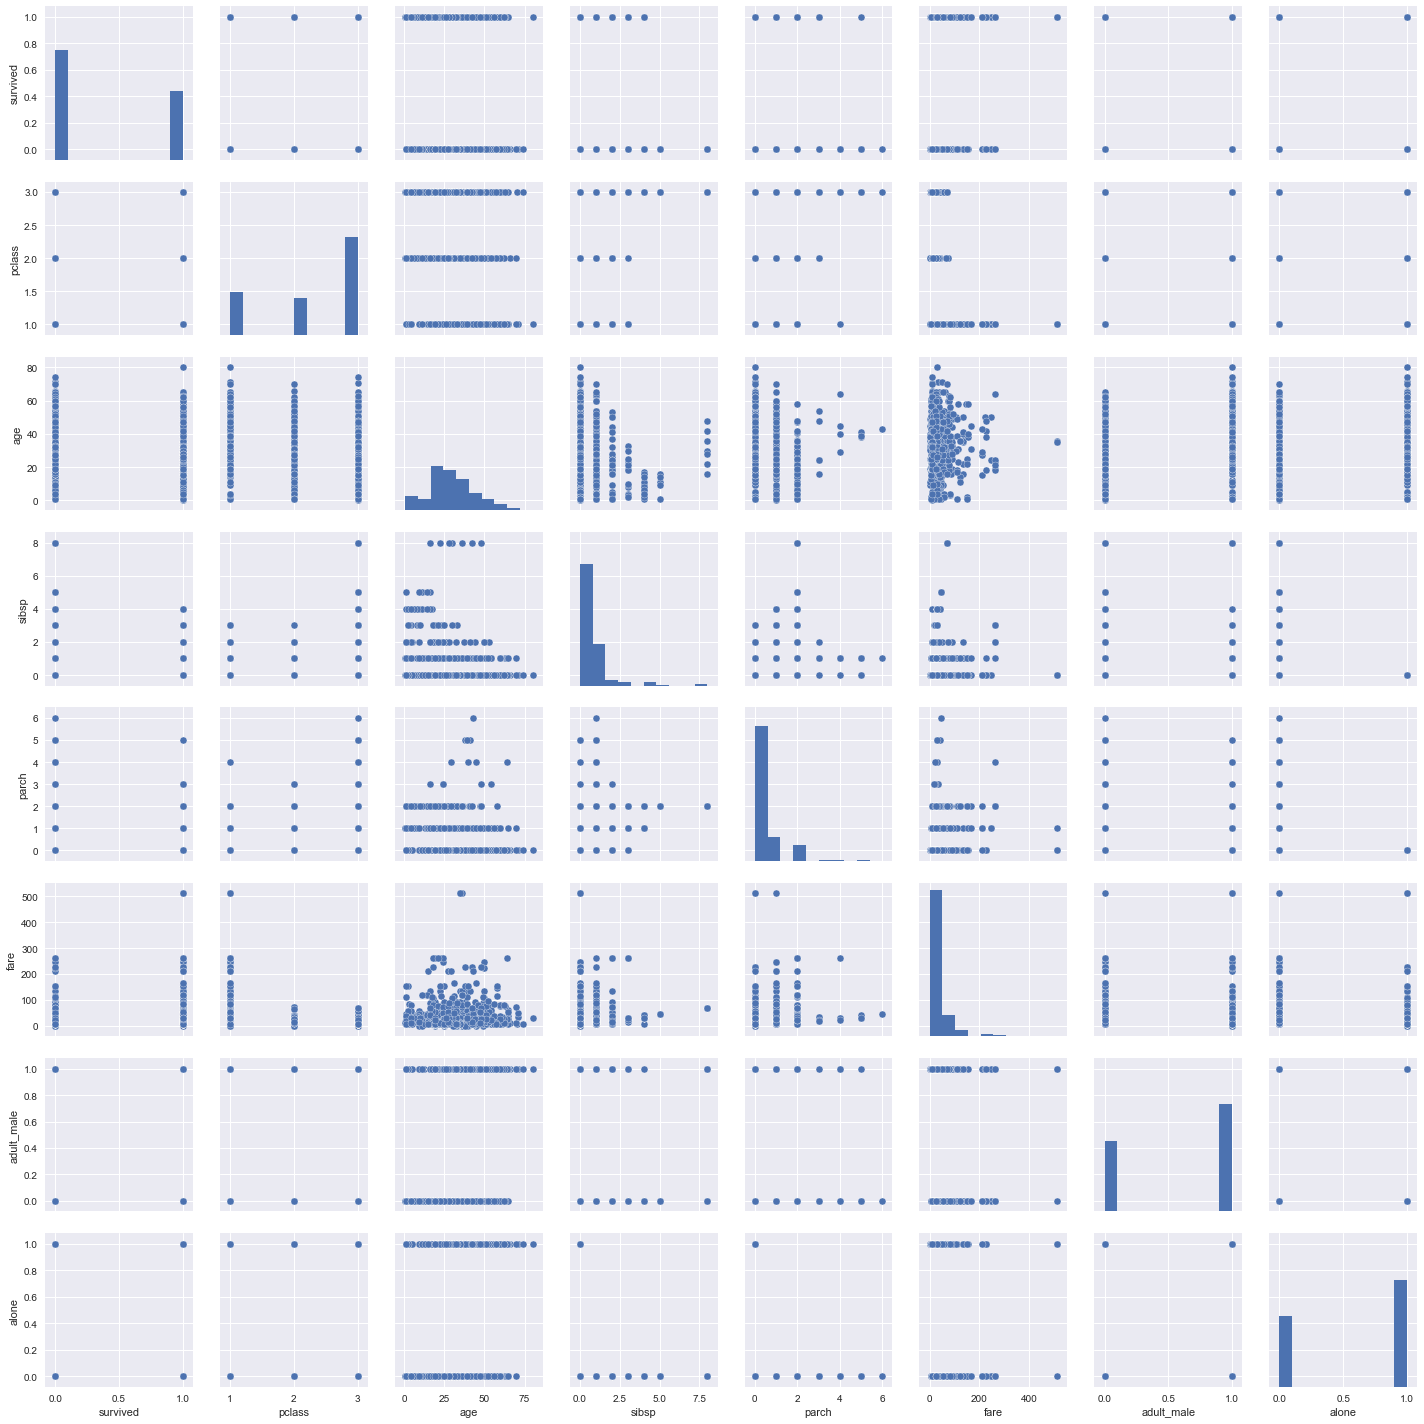

In [130]:
## Pairwise relationship
plt.rc("text", usetex=False)
sns.pairplot(titanic_df.fillna(method="pad"))

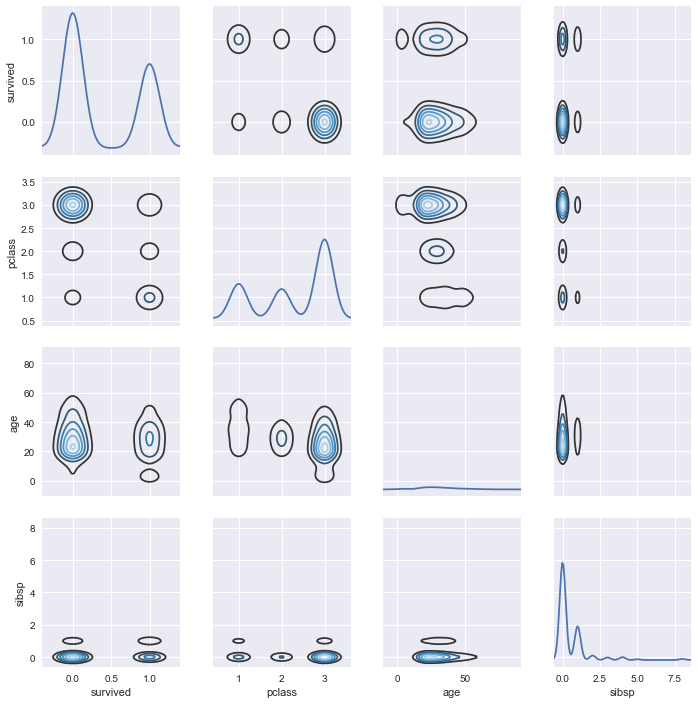

In [132]:
g = sns.PairGrid(titanic_df.iloc[:,:5].fillna(method="pad"))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## Categorical variables

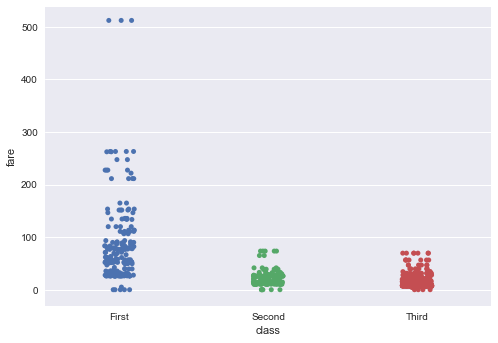

In [137]:


sns.stripplot(x="class", y="fare", data=titanic_df, jitter=True)

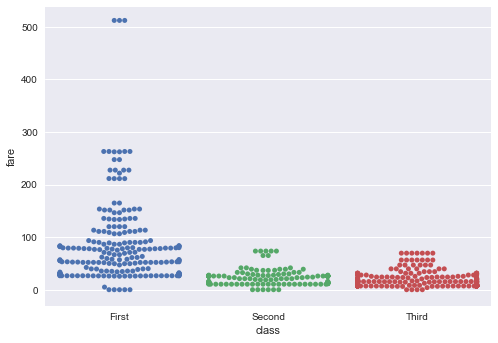

In [139]:
## Spread the data using algorithm to avoid overlapping
sns.swarmplot(x="class", y="fare", data=titanic_df)

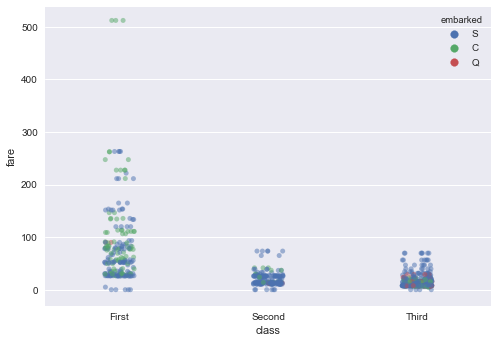

In [143]:
## Spread the data using algorithm to avoid overlapping
sns.stripplot(x="class", y="fare", hue="embarked", data=titanic_df, jitter=True, alpha=0.5)

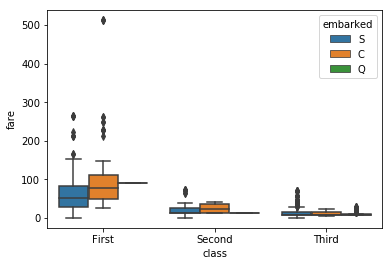

In [6]:
#boxplot

sns.boxplot(x="class", y="fare", hue="embarked", data=titanic_df)

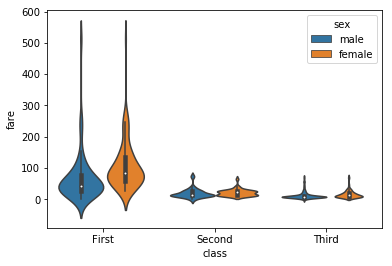

In [8]:
## density
sns.violinplot(x="class", y="fare", hue="sex", data=titanic_df)

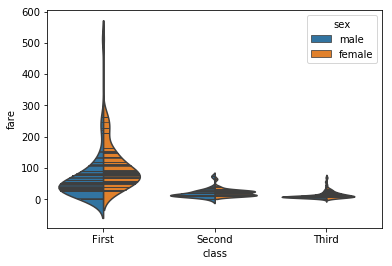

In [10]:
sns.violinplot(x="class", y="fare", hue="sex", data=titanic_df, split=True, inner="stick")

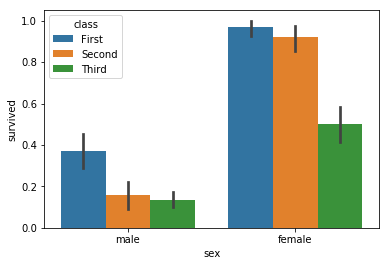

In [14]:
## barplot

sns.barplot(x="sex", y="survived", hue="class", data=titanic_df)

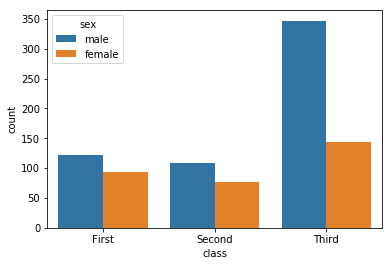

In [72]:
# countplot
sns.countplot(x="class", hue="sex", data=titanic_df)

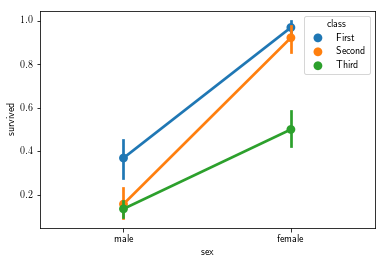

In [28]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic_df)

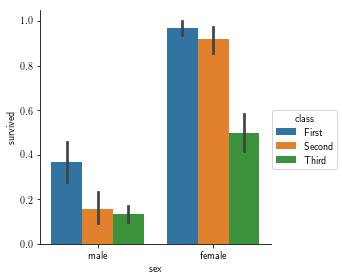

In [31]:
## Factorplot

sns.factorplot(x="sex", y="survived", hue="class", data=titanic_df, kind="bar")

## Linear relationships

In [33]:
tips_df = sns.load_dataset("tips")

tips_df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
17        16.29  3.71    Male     No   Sun  Dinner     3
18        16.97  3.50  Female     No   Sun  Dinner     3
19        20.65  3.35    Male     No   Sat  Dinner     3
20        17.92  4.08    Male     No   Sat  Dinner     2
21        20.29  2.75  Female     No   Sat  Dinner     2
22        15.77  2.23  Female     No   Sat  Dinner     2
23        39.42  7.58    Male     No   Sat  Dinner     4
24        19.82  3.18    Male     No   Sat  Dinner     2
25        17.81  2.34    Male     No   Sat  Dinner     4
26        13.37  2.00    Male     No   Sat  Dinner     2
27        12.69  2.00    Male     No   Sat  Dinner     2
28        21.70  4.30    Male     No   Sat  Dinner     2
29        19.65  3.00  Female     No   Sat  Dinner     2
..          ...   ...     ...    ...   ...     ...   ...
214       28.17  6.50  Female    Yes   Sat  Dinner     3
215       12.90  1.10  Female    Yes   Sat  Dinner     2
216       28.15  3.00    Male    Yes   Sat  Dinner     5
217       11.59  1.50    Male    Yes   Sat  Dinner     2
218        7.74  1.44    Male    Yes   Sat  Dinner     2
219       30.14  3.09  Female    Yes   Sat  Dinner     4
220       12.16  2.20    Male    Yes   Fri   Lunch     2
221       13.42  3.48  Female    Yes   Fri   Lunch     2
222        8.58  1.92    Male    Yes   Fri   Lunch     1
223       15.98  3.00  Female     No   Fri   Lunch     3
224       13.42  1.58    Male    Yes   Fri   Lunch     2
225       16.27  2.50  Female    Yes   Fri   Lunch     2
226       10.09  2.00  Female    Yes   Fri   Lunch     2
227       20.45  3.00    Male     No   Sat  Dinner     4
228       13.28  2.72    Male     No   Sat  Dinner     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
230       24.01  2.00    Male    Yes   Sat  Dinner     4
231       15.69  3.00    Male    Yes   Sat  Dinner     3
232       11.61  3.39    Male     No   Sat  Dinner     2
233       10.77  1.47    Male     No   Sat  Dinner     2
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

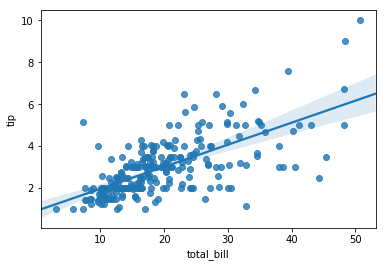

In [34]:
sns.regplot(x="total_bill", y="tip", data=tips_df)

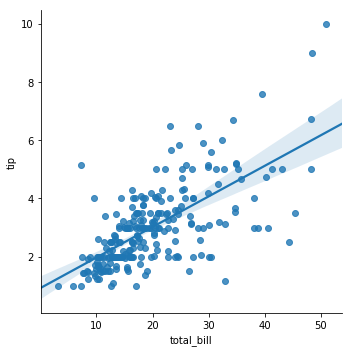

In [35]:
sns.lmplot(x="total_bill", y="tip", data=tips_df)

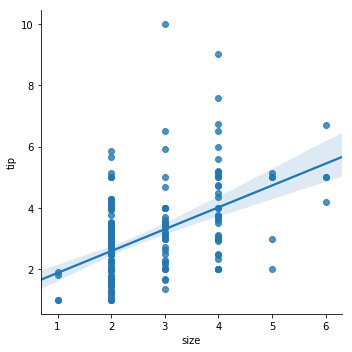

In [37]:
## We can have some summary statistics on the x-axis
import numpy as np

sns.lmplot(x="size", y="tip", data=tips_df)

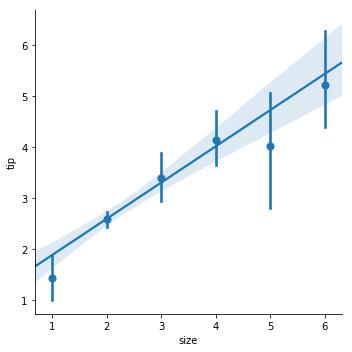

In [38]:
sns.lmplot(x="size", y="tip", data=tips_df, x_estimator=np.mean)

In [39]:
anscombe_df = sns.load_dataset("anscombe")

anscombe_df

dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89

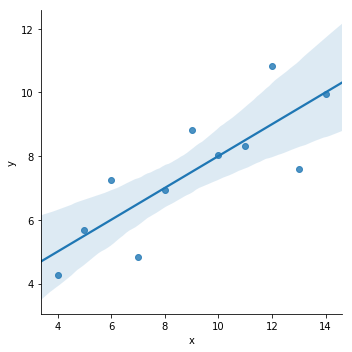

In [49]:
sns.lmplot(x="x",
           y="y",
           data=anscombe_df.loc[anscombe_df["dataset"]=="I"], order=1)

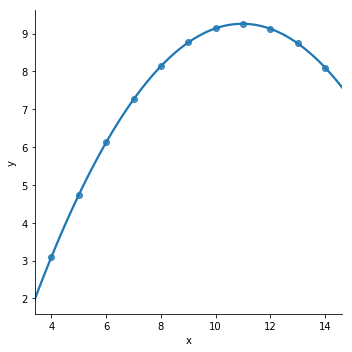

In [50]:
sns.lmplot(x="x",
           y="y",
           data=anscombe_df.loc[anscombe_df["dataset"]=="II"],
           order=2)

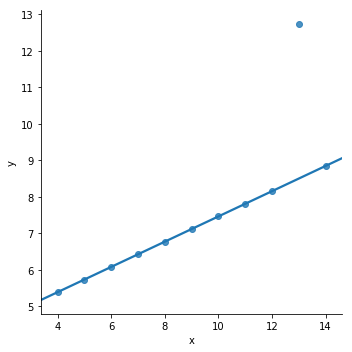

In [54]:
sns.lmplot(x="x",
           y="y",
           data=anscombe_df.loc[anscombe_df["dataset"]=="III"],
           order=1,
           robust=True, ci=None)

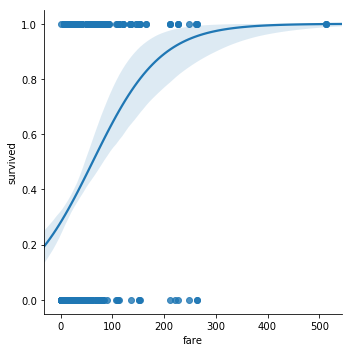

In [61]:
sns.lmplot(x="fare",
           y="survived",
           data=titanic_df,
           logistic=True)

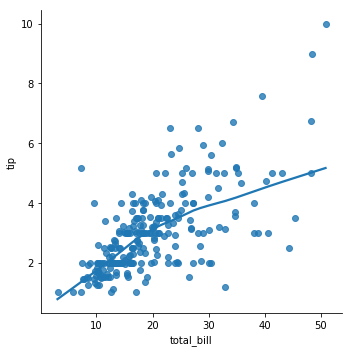

In [66]:
sns.lmplot(x="total_bill",
           y="tip",
           data=tips_df,
           lowess=True);

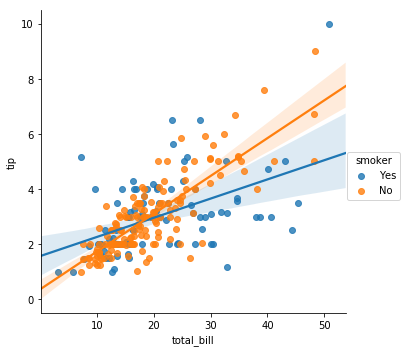

In [70]:
sns.lmplot(x="total_bill",
           y="tip",
           data=tips_df,
           hue="smoker")

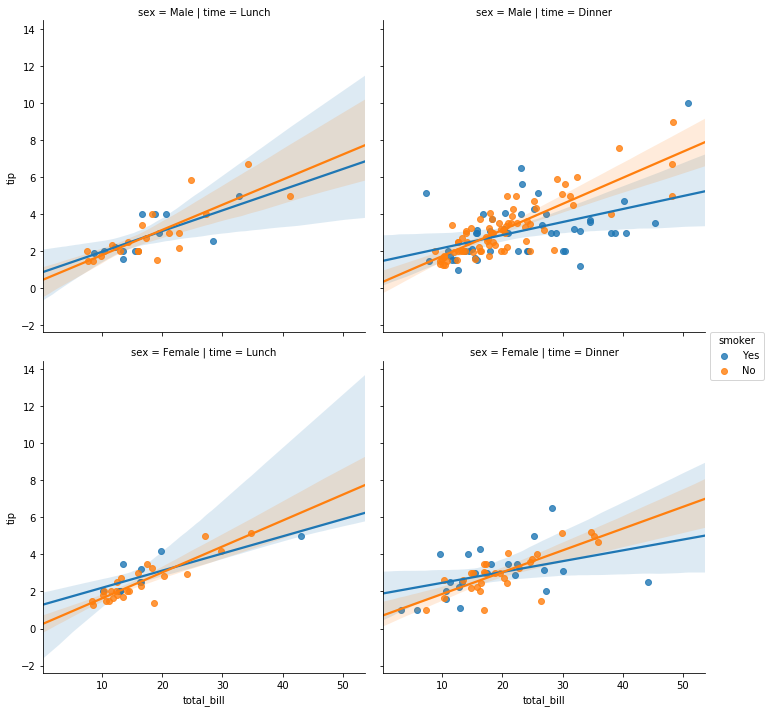

In [76]:
sns.lmplot(x="total_bill",
           y="tip",
           col="time",
           row="sex",
           hue="smoker",
           data=tips_df)

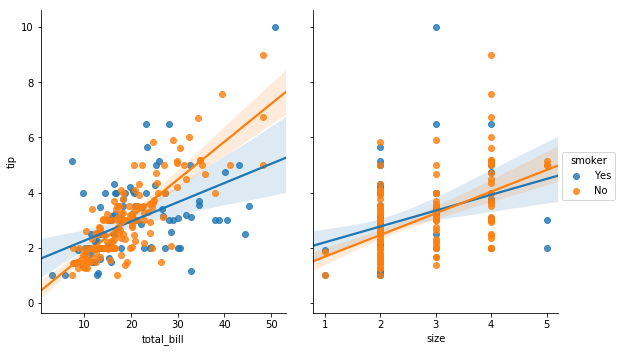

In [78]:
sns.pairplot(tips_df,
             x_vars=["total_bill", "size"],
             y_vars=["tip"],
             hue="smoker",
             size=5,
             aspect=.8,
             kind="reg");

## Facetgrid

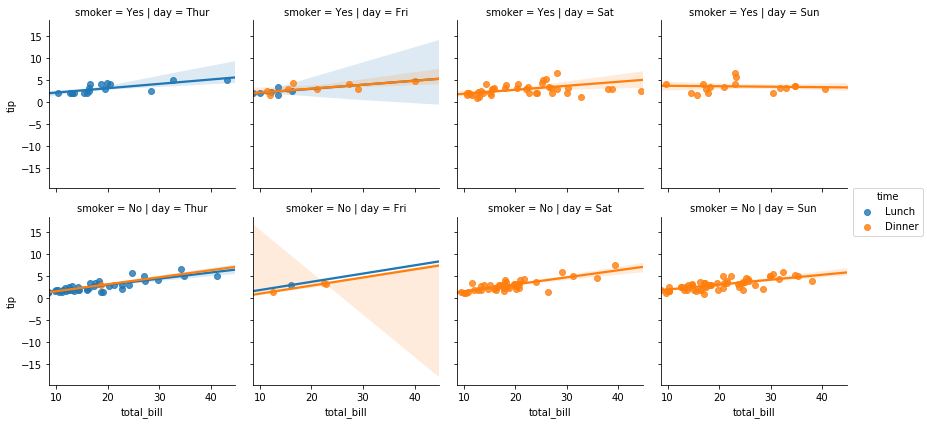

In [88]:
g = sns.FacetGrid(tips_df, row="smoker", col="day", hue="time")
g.map(sns.regplot, "total_bill", "tip")
g.add_legend()

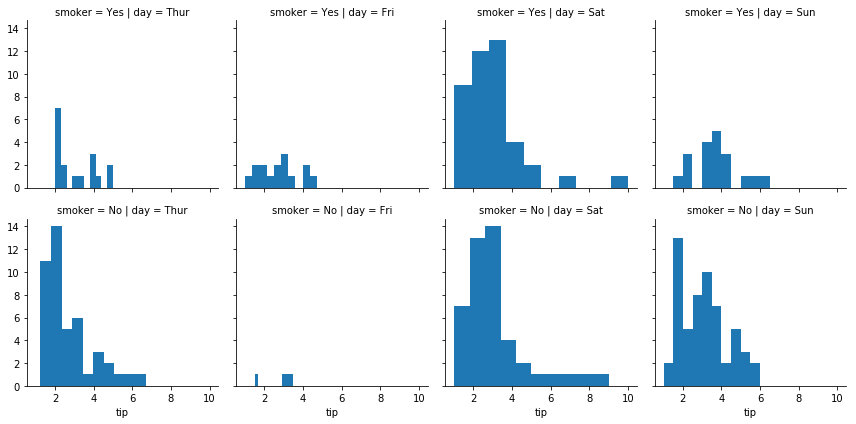

In [90]:
g = sns.FacetGrid(tips_df, row="smoker", col="day")
g.map(plt.hist, "tip")